# Load data and compute stats
Following cell reads csv file to pandas dataframe and computes following stats: points, gap to the leader, points on road courses, points on oval courses, points on street courses, points per race, average position, standard deviation of position, number of races started, number of wins, number of podiums, number of top 5 finishes, number of top 10 finishes.

In [ ]:
import flag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

no_races = 3
pts = {1:50, 2:40, 3:35, 4:32, 5:30, 6:28, 7:26, 8:24, 9:22,
       10:20,11:19, 12:18, 13:17, 14:16, 15:15, 16:14, 17:13, 
       18:12,19:11, 20:10, 21:9, 22:8, 23:7, 24:6, 25:5, 
       26:5, 27:5, 28:5, 29:5, 30:5, 31:5, 32:5, 33:5}
pts_indy = {1:100, 2:80, 3:70, 4:64, 5:60, 6:56, 7:52, 8:48, 9:44,
       10:40,11:38, 12:36, 13:34, 14:32, 15:30, 16:28, 17:26, 
       18:24,19:22, 20:20, 21:18, 22:16, 23:14, 24:12, 25:10, 
       26:10, 27:10, 28:10, 29:10, 30:10, 31:10, 32:10, 33:10, 34:5}
pts_q = {1:12, 2:11, 3:10, 4:9, 5:8, 6:7, 7:6, 8:5, 9:4, 10:3, 11:2, 12:1,
         13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 
         23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0, 30:0, 31:0, 32:0, 33:0}
pts_bonus = {'MLP':4, 'ML':3, 'MP':3, 'LP':2, 'L':1, 'P':1}
df = pd.read_csv('Indycar2022.csv')
columns = df.columns
point_dict = {}
for i, column in enumerate(columns):
    if 3<i<9 or 10<i<22:
        point_dict[column]=pts
    elif i==9:
        point_dict[column]=pts_q
    elif i==10:
        point_dict[column]=pts_indy
    elif i>21:
        point_dict[column]=pts_bonus
positions_on_specific_tracks = False
ovals = columns[np.r_[5, 10, 15:17, 19]]
street = columns[np.r_[4, 6, 11, 14, 18]]
road = columns[np.r_[7:9, 12:14, 17, 20:22]]
ovals_bonuses = columns[np.r_[9, 23, 27, 32:34, 36]]
street_bonuses = columns[np.r_[22, 24, 28, 31, 35]]
road_bonuses = columns[np.r_[25:27, 29:31, 34, 37:39]]
races = columns[np.r_[4:9,10:22]]

df2 = df.replace(point_dict)
df2["Points"] = df2.iloc[:,4:-1].sum(axis=1)
df_res = df2.iloc[:,np.r_[:4,-1]]
df_res = pd.DataFrame(df_res)
df_res['To 1st'] = df_res['Points'] - df_res['Points'].max()
df_res['PTR'] = df2[road].sum(axis=1) + df2[road_bonuses].sum(axis=1)
df_res['PTO'] = df2[ovals].sum(axis=1) + df2[ovals_bonuses].sum(axis=1)
df_res['PTSt'] = df2[street].sum(axis=1) + df2[street_bonuses].sum(axis=1)
df_res['PPR'] = (df_res['Points'] / (df[columns[np.r_[4:9,10:22]]]).count(1)).round(2)
df_res['AVG Pos'] = df.iloc[:,np.r_[4:9, 10:22]].mean(1).round(1)
df_res['PosDEV'] = df.iloc[:,np.r_[4:9, 10:22]].std(1).round(1)
df_res["Starts"] = (df[races]).count(1)
df_res["Wins"] = (df[races] == 1).sum(1)
df_res["Top 3"] = (df[races] <= 3).sum(1)
df_res["Top 5"] = (df[races] <= 5).sum(1)
df_res["Top 10"] = (df[races] <= 10).sum(1)
df["Points"] = df_res['Points']
df_res['Country'] = df['Country'].apply(lambda x: flag.flag(x))
df_res.insert(3, 'Country', df_res.pop('Country'))
df_res.sort_values(['Points', 'Wins'], axis=0, ascending=False, inplace=True)
df_res = df_res.reset_index(drop=True)
df_res['Pos'] = range(1, df_res.shape[0]+1)
df_res.insert(0, 'Pos', df_res.pop('Pos'))
df2.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df2 = df2.reset_index(drop=True)

## Positions in Road, Oval and Street classifications
Following cell computes positions in 3 types of tracks classifications to the PTR, PTO and PTSt columns.

In [ ]:
if not positions_on_specific_tracks:
    positions_on_specific_tracks = True
    types_of_tracks = ['PTR', 'PTO', 'PTSt']
    for type_of_track in types_of_tracks:
        points = list(df_res[type_of_track])
        positions = df_res[type_of_track].rank(ascending=False)
        df_res[type_of_track] = pd.Series([f'{int(points[i])} ({int(positions[i])})' for i in range(len(df_res))])

# Pyplot top 10 plot
Following cell creates and saves top 10 general classification plot using pyplot module of matplotlib.

<Figure size 432x288 with 0 Axes>

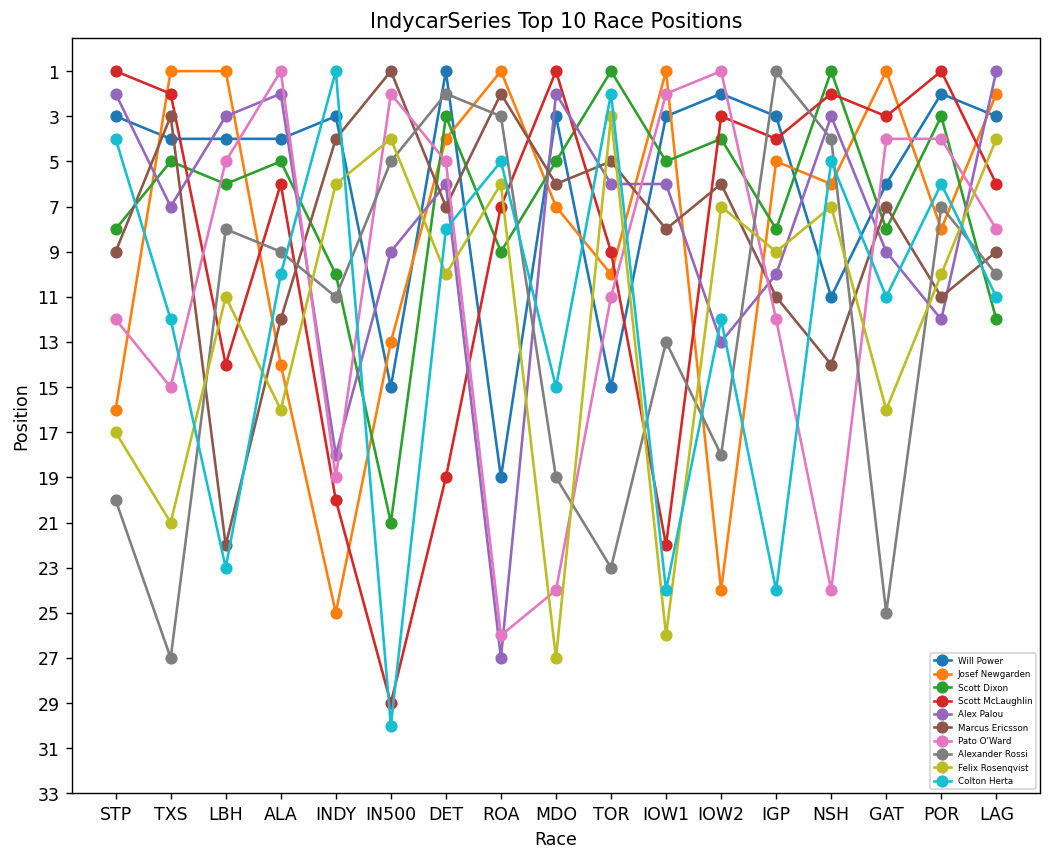

In [3]:
df.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df = df.reset_index(drop=True)
plt.clf()
plt.figure(figsize=(10,8), dpi=125, facecolor=(1, 1, 1))
for index, row in df[races].iterrows():
    if index == 10:
        break
    plt.plot(row, 'o-')
plt.gca().invert_yaxis()
plt.title('IndycarSeries Top 10 Race Positions')
plt.xlabel("Race")
plt.ylabel("Position")
plt.legend(df['Driver'], loc='lower right', prop={'size': 5})
plt.yticks(range(1,34, 2))
# plt.savefig('Indycar Top 10.jpg', bbox_inches='tight', dpi=300)
plt.show()

# Seaborn top 10 plot
Following cell creates top 10 general classification plot using seaborn.

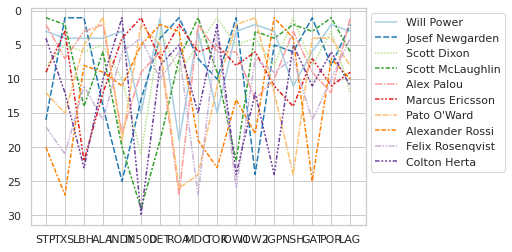

In [4]:
import seaborn as sns
df.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df = df.reset_index(drop=True)
df_t = df[races].transpose()
df_t.columns = df['Driver'].tolist()
df_t = df_t.iloc[:, 0:10]
sns.set(style="whitegrid")
sns.lineplot(data=df_t, palette='Paired')
# sns.lineplot(data=df, x= palette='Paired')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.gca().invert_yaxis()
plt.show()
# df

# Styling and showing GC
Following cell styles and shows GC of Indycar Series. It shows top 25 by default. If you want to show different number of drivers, you'll need to change the value of how_many_rown variable in first line and execute cell again.

In [ ]:
how_many_rows = 20
only_rookies = False

def where(data):
    # ['3 Teams', 'AJ Foyt', 'Andretti', 'Arrow McLaren', 'Chip Ganassi', 
    # 'Dale Coyne', 'Dragonspeed/Cusick', 'Dreyer & Reinbold', 'Ed Carpenter', 
    # 'Juncos Hollinger', 'Meyer Shank', 'Paretta', 'Penske', 'Rahal Letterman']
    cm = ['#000000','#A39B73', '#FFFEA3', '#F07F19', '#642701', '#5E5AA8', '#34AAE1', '#525763', '#C81B22', '#059C42', '#C90277', '#8dc8e8', '#292929', '#AD1722']
    label_color = ['white','black', 'black', 'white', 'white', 'white', 'white', 'white','white', 'white', 'white', 'white', 'white', 'white']
    teams = list(df['Team'].unique())
    teams.sort()
    res = []
    for x in data:
        for i, y in enumerate(teams):
            if x in y:
                res.append(f"background-color: {cm[i]}; color: {label_color[i]}")
                break
    while len(res) < len(data):
        res.append('')
    return res
def highlight_everyother(s):
    if s.name%2==1:
        return ['background-color: #212121; color: white; border-color: #212121; text-align: right'] * len(s)
    else:
        return ['background-color: #111111; color: white; border-color: #111111; text-align: right'] * len(s)
pd.set_option('colheader_justify', 'center')
if only_rookies:
    df_st = df_res[df_res['Rookie'] == 'R']
else:
    df_st = df_res
df_st = df_st.head(how_many_rows).style.apply(highlight_everyother, axis=1)
df_st = df_st.apply(where, subset=['Team'])
df_st.hide_columns(subset=['Rookie'])
df_st.hide_index()
if not positions_on_specific_tracks:
    df_st.format({'Points':'{:.0f}', 'To 1st':'{:.0f}', 'PTR':'{:.0f}', 'PTO':'{:.0f}', 'PTSt':'{:.0f}', 'PPR':'{:.2f}', 'AVG Pos': '{:.1f}', 'PosDEV': '{:.1f}'})
else:
    df_st.format({'Points':'{:.0f}', 'To 1st':'{:.0f}', 'PPR':'{:.2f}', 'AVG Pos': '{:.1f}', 'PosDEV': '{:.1f}'})
df_st.set_properties(subset=['Team'], **{'text-align': 'center', 'font-weight':'bold'})
df_st.set_properties(subset=['Country'], **{'text-align': 'center'})
df_st.set_properties(subset=['Driver'], **{'font-weight':'bold'})
df_st.set_properties(subset=['Points'], **{'font-weight':'bold', 'color':'white'})
df_st.set_properties(subset=['Starts', 'Wins', 'Top 3', 'Top 5', 'Top 10'], **{'text-align': 'center'})
df_st.set_table_styles([{'selector': 'th.col_heading.col5', 'props': 'text-align: center'}])


Pos,Driver,Nr,Country,Team,Points,To 1st,PTR,PTO,PTSt,PPR,AVG Pos,PosDEV,Starts,Wins,Top 3,Top 5,Top 10
1,Will Power,12,🇦🇺,Penske,560,0,228 (2),176 (4),156 (3),32.94,5.9,5.5,17,1,9,12,13
2,Josef Newgarden,2,🇺🇲,Penske,544,-16,196 (3),198 (3),150 (4),32.00,8.2,7.8,17,5,6,8,12
3,Scott Dixon,9,🇳🇿,Chip Ganassi,521,-39,179 (7),149 (5),193 (1),30.65,6.7,4.8,17,2,4,9,15
4,Scott McLaughlin,3,🇳🇿,Penske,510,-50,233 (1),132 (7),145 (5),30.00,8.8,8.7,17,3,7,8,12
5,Álex Palou,10,🇪🇸,Chip Ganassi,510,-50,189 (4),149 (5),172 (2),30.00,8.0,6.7,17,1,6,6,13
6,Marcus Ericsson,8,🇸🇪,Chip Ganassi,506,-54,180 (6),224 (2),102 (11),29.76,8.1,5.1,17,1,3,5,12
7,Pato O'Ward,5,🇲🇽,Arrow McLaren,480,-80,150 (11),226 (1),104 (10),28.24,10.3,8.6,17,2,4,8,9
8,Alexander Rossi,27,🇺🇲,Andretti,401,-159,188 (5),99 (12),114 (7),23.59,12.1,8.4,17,1,3,5,9
9,Felix Rosenqvist,7,🇸🇪,Arrow McLaren,393,-167,154 (10),125 (9),114 (7),23.12,11.8,7.5,17,0,1,3,10
10,Colton Herta,26,🇺🇲,Andretti,381,-179,173 (8),71 (23),137 (6),22.41,11.9,8.6,17,1,2,5,8


<Figure size 640x480 with 0 Axes>

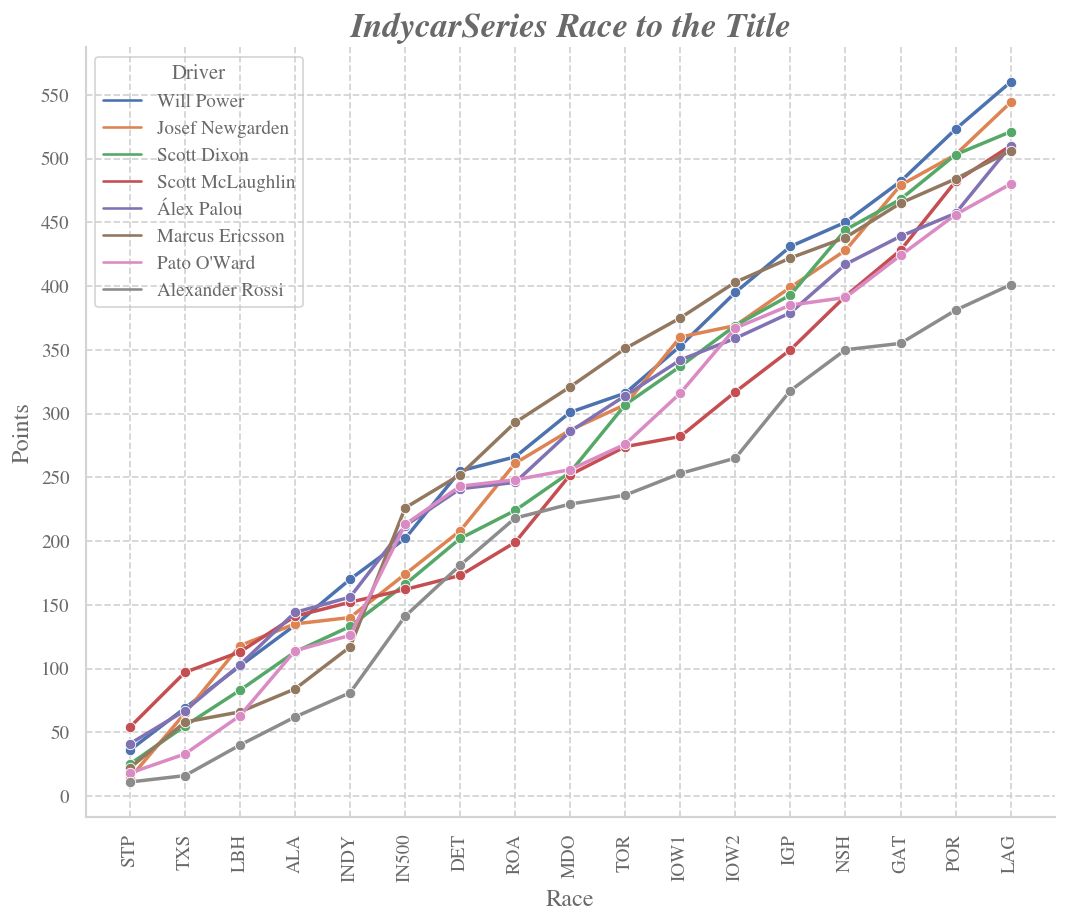

In [13]:
# df_points = df2.loc[:, 'STP':'R17']
# df_points = pd.concat((df2.loc[:,'Driver'], df2.loc[:, 'STP':'R17']))
# df_points.columns[0] = 'Driver'
how_many_races = df_res['Starts'].max()
race_names = ['STP', 'TXS', 'LBH', 'ALA', 'INDY', 'IN500', 'DET', 'ROA',
              'MDO', 'TOR', 'IOW1', 'IOW2', 'IGP', 'NSH', 'GAT', 'POR', 'LAG'][:how_many_races]
points_array = np.zeros((df2.shape[0], how_many_races))
df2 = df2.fillna(0)
for i in range(points_array.shape[0]):
    for j in range(points_array.shape[1]):
        if j < 5:
            points_array[i,j] = df2.iloc[i, 4:4+j+1].to_numpy().sum() 
        
        elif j>=5:
            points_array[i,j] = df2.iloc[i, 4:4+j+2].to_numpy().sum()
        points_array[i,j] += df2.iloc[i, 22:22+j+1].to_numpy().sum()
max_points = int(points_array[0, -1])

plt.clf()
plt.figure(figsize=(10,8), dpi=125)
# for index, row in enumerate(points_array):
#     if index == 8:
#         break
#     plt.plot(row, 'o-')
# points_remaining = np.array([16*54-x*54 for x in range(16)])
# points_to_secure = points_remaining[how_many_races-1]+points_array[0, how_many_races -1] - (points_array[0, how_many_races -1] - points_array[1, how_many_races -1])
# cutoff = points_array[0, how_many_races -1] - points_remaining[how_many_races-1]
# plt.plot([cutoff]*how_many_races, '--')
# plt.plot([points_to_secure]*how_many_races, '--')
# plt.gca().invert_yaxis()

df_standings = pd.concat([pd.Series(race_names)]*35,axis=0).reset_index().drop('index', axis=1).rename({0:'Race'}, axis=1)
df_standings['Points'] = pd.Series(points_array.reshape(-1))
df_standings['Driver'] = df2['Driver'].repeat(how_many_races).reset_index(drop=True)

# plt.figure(figsize=(,5),dpi=200)
# sns.set(style="whitegrid")

sns.set(font='Nimbus Roman',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'grid.color': 'lightgrey',
 'grid.linestyle': 'dashed',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': '#dee1e3',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":12,
                                "axes.titlesize":20,
                                "axes.labelsize":14})

ax = sns.lineplot(data=df_standings[df_standings['Driver'].isin(df2['Driver'][:8])], x='Race', y='Points', hue='Driver', palette='deep', linewidth=2, marker='o', markeredgewidth=0.5)
ax.set_axisbelow(True)
plt.title('IndycarSeries Race to the Title', fontweight='bold', fontstyle='italic')
plt.xlabel("Race")
plt.ylabel("Points")
# plt.legend((*df2['Driver'][:8], 'Cutoff', 'To secure'), loc='lower right', prop={'size': 12})
plt.yticks(range(0, max_points+1, 50))
plt.xticks(range(how_many_races), race_names, rotation=90)
# plt.savefig('Indycar Top 10.jpg', bbox_inches='tight', dpi=300)
# plt.show()
plt.savefig('exported_images/Race to title.png', bbox_inches='tight', dpi=150, transparent=False)
# pd.DataFrame([pd.Series(points_array.reshape(-1)), ])

In [11]:
df['Team'].value_counts()

Chip Ganassi          5
Andretti              5
AJ Foyt               4
Penske                3
Arrow McLaren         3
Rahal Letterman       3
Ed Carpenter          3
Meyer Shank           2
Dale Coyne            2
Juncos Hollinger      1
3 Teams               1
Paretta               1
Dreyer & Reinbold     1
Dragonspeed/Cusick    1
Name: Team, dtype: int64

In [12]:
df_res.groupby('Team').sum()[['Wins', 'Top 3', 'Top 5', 'Top 10']]

,Wins,Top 3,Top 5,Top 10
Team,,,,
3 Teams,0,0,0,2
AJ Foyt,0,0,0,1
Andretti,2,6,13,24
Arrow McLaren,2,5,11,19
Chip Ganassi,4,14,22,43
Dale Coyne,0,1,2,7
Dragonspeed/Cusick,0,0,0,0
Dreyer & Reinbold,0,0,0,0
Ed Carpenter,0,1,4,8


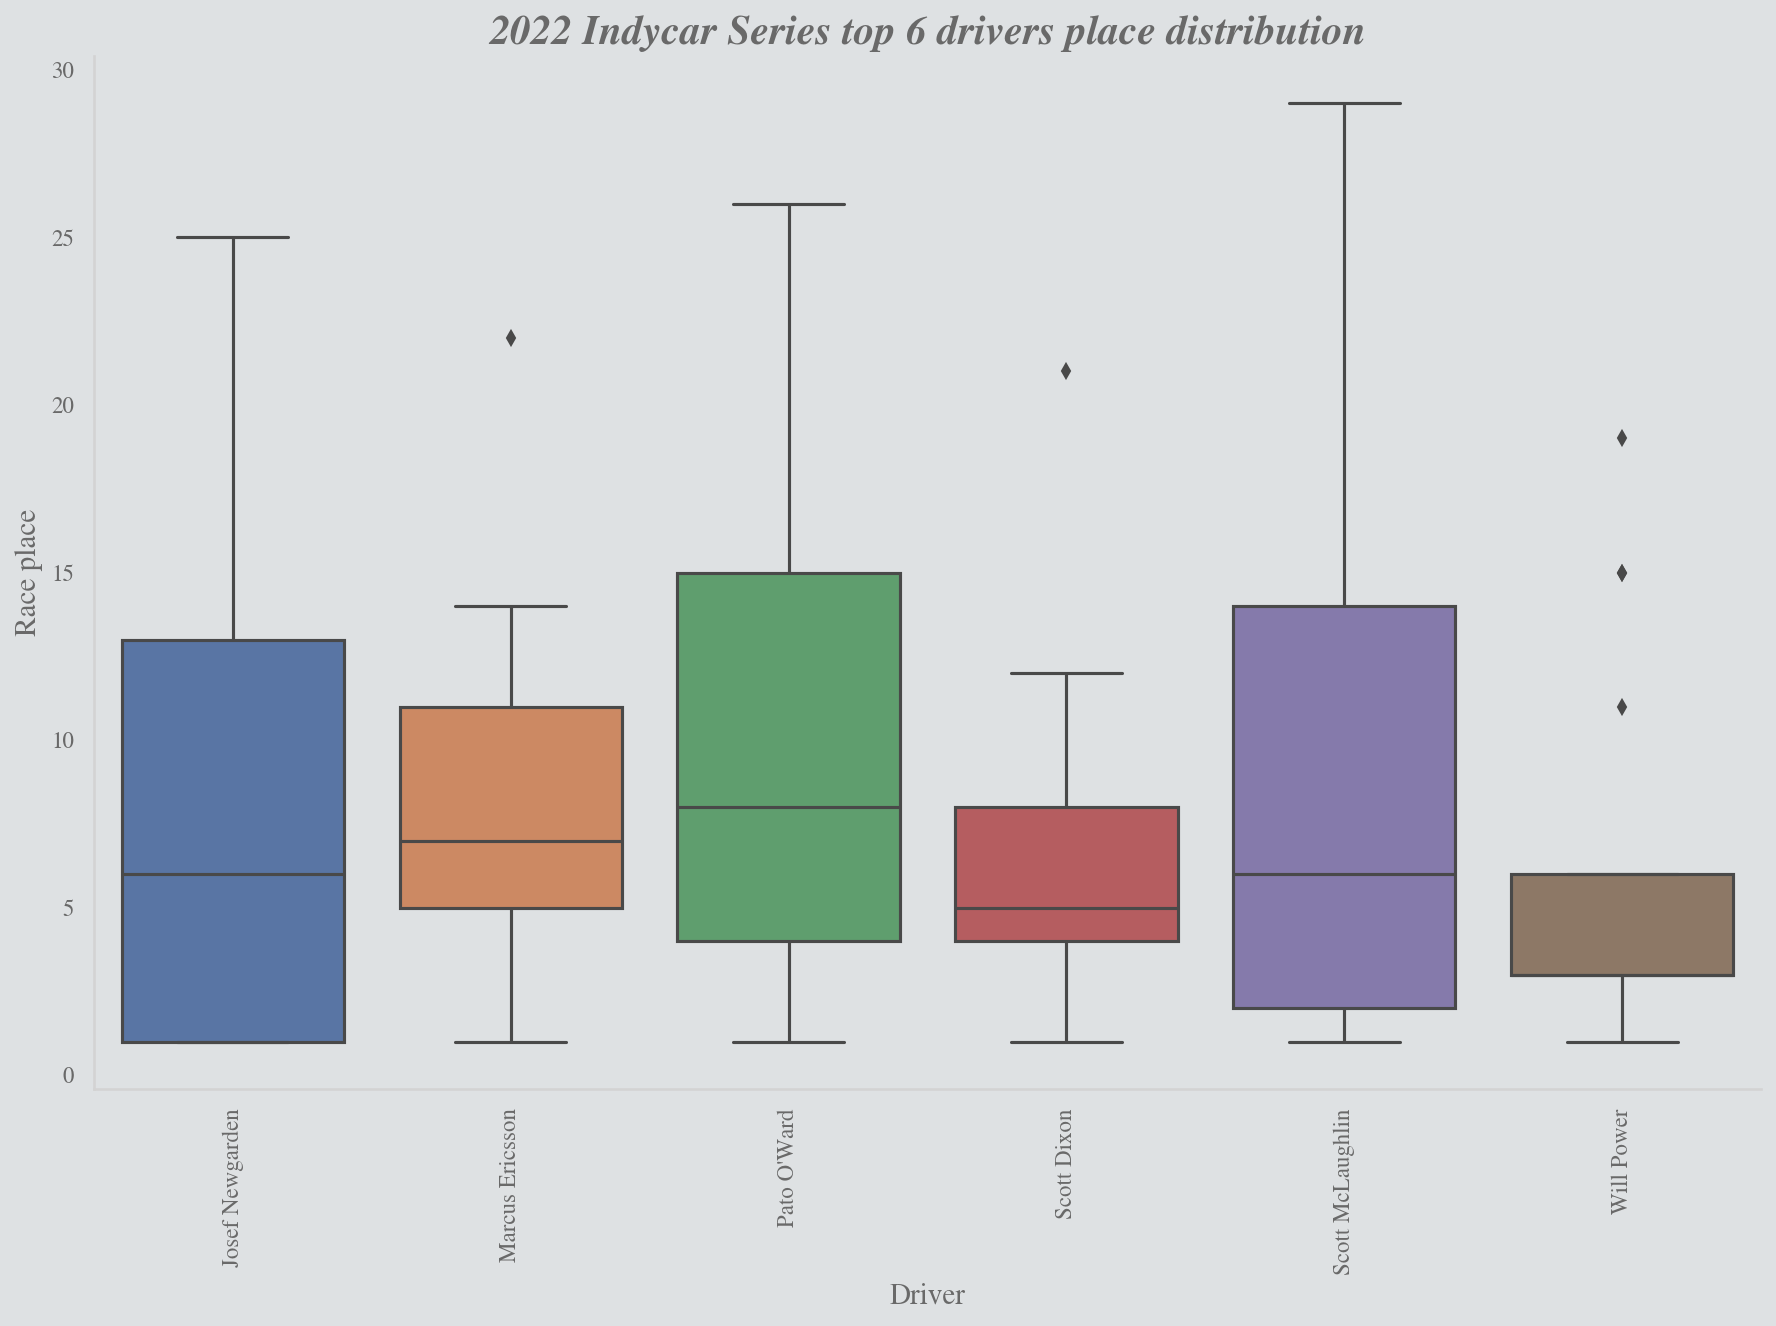

In [18]:
import matplotlib as mpl

race_performances = []
race_performances.append('Driver')
race_performances.extend(list(races))
# df[race_performances].set_index('Driver').transpose().describe().transpose()

mpl.rc_file_defaults()
sns.set(font='Nimbus Roman',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color': 'lightgrey',
 'grid.linestyle': 'dashed',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': '#dee1e3',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":12,
                                "axes.titlesize":20,
                                "axes.labelsize":14})

df_stats = pd.DataFrame(df[race_performances].set_index('Driver').stack(), columns=['Race place']).reset_index()
selected_drivers = ['Will Power', 'Josef Newgarden', 'Scott Dixon', 'Marcus Ericsson',
       'Scott McLaughlin', 'Alex Palou', "Pato O'Ward"]
plt.figure(figsize=(12,9), dpi=150)
plt.xticks(rotation=90)
plt.title('2022 Indycar Series top 6 drivers place distribution', fontweight='bold', fontstyle='italic')
sns.boxplot(data=df_stats[df_stats['Driver'].isin(selected_drivers)], y='Race place', x='Driver', palette='deep')
plt.tight_layout()
plt.savefig('exported_images/Race places.png')
# df[race_performances].set_index('Driver').transpose().describe().transpose()

In [ ]:
import matplotlib as mpl

mpl.rc_file_defaults()

In [31]:
df_quali = pd.read_csv('Indycar2022Quali.csv')
cols = df_quali.columns[4:]
df_res = pd.concat([df_quali[df_quali.columns[:4]], df_quali[cols] - df[cols]], axis=1)
df_res['AvgQ'] = df_quali[cols].mean(axis=1)
df_res['AvgR'] = df[cols].mean(axis=1)
df_res['AvgPosGain'] = (df_quali[cols] - df[cols]).mean(axis=1)
df_res.sort_values('AvgPosGain', ascending=False)


,Driver,Rookie,Nr,Team,STP,TXS,LBH,ALA,INDY,IN500,...,IOW1,IOW2,IGP,NSH,GAT,POR,LAG,AvgQ,AvgR,AvgPosGain
17,Juan Pablo Montoya,NaN,6,Arrow McLaren,NaN,NaN,NaN,NaN,-1.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.500000,17.500000,9.000000
13,J. R. Hildebrand,NaN,11,AJ Foyt,NaN,11.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,13.000000,8.000000
29,Stefan Wilson,NaN,25,Dragonspeed/Cusick,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,26.000000,7.000000
25,Santino Ferrucci,NaN,23,3 Teams,NaN,18.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.666667,13.333333,6.333333
26,Scott Dixon,NaN,9,Chip Ganassi,-1.0,0.0,10.0,8.0,11.0,-20.0,...,8.0,14.0,12.0,13.0,-2.0,13.0,1.0,11.058824,6.705882,4.352941
11,Graham Rahal,NaN,15,Rahal Letterman,4.0,4.0,6.0,1.0,-4.0,7.0,...,7.0,9.0,10.0,-14.0,6.0,6.0,1.0,16.470588,12.352941,4.117647
20,Marcus Ericsson,NaN,8,Chip Ganassi,-1.0,11.0,-14.0,0.0,14.0,4.0,...,4.0,9.0,14.0,4.0,-5.0,7.0,0.0,11.647059,8.058824,3.588235
15,Jimmie Johnson,NaN,48,Chip Ganassi,3.0,12.0,5.0,2.0,5.0,-16.0,...,4.0,8.0,1.0,7.0,7.0,-1.0,7.0,21.941176,18.588235,3.352941
31,Tatiana Calderón,R,11,AJ Foyt,1.0,NaN,10.0,-1.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.142857,22.000000,3.142857
32,Tony Kanaan,NaN,1,Chip Ganassi,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,3.000000,3.000000
